In [1]:
# Import all the nessasary add-ons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
class_df = pd.read_csv("CSCI_Fall_2024_survey.csv")

# Function that removes extra spaces
# while also making all the characters of each row 
# within each column that I will be standardizing lowercase
# using .str.strip() for the first part
# and .str.lower() for the second part
def clean_data(class_df, location ='What state/country were you born in?', 
               pets ='How many pets and of which kind do you have?', 
               food ='What is your favorite type of food?', 
               major ='What is your major?'):
    class_df[location] = class_df[location].str.strip().str.lower()
    class_df[pets] = class_df[pets].str.strip().str.lower()
    class_df[food] = class_df[food].str.strip().str.lower()
    class_df[major] = class_df[major].str.strip().str.lower()
    return class_df

# Function to standardize the location column
# Responses are standardized by if the students are from the United States
# Using np.where for any responses that needed to be altered
def standardize_location(class_df, location='What state/country were you born in?'):
    class_df["From the United States?"] = np.where(class_df[location]=="Missouri", "Yes", 
        np.where(class_df[location]=="missouri", "Yes",
        np.where(class_df[location]=="wisconsin", "Yes",
        np.where(class_df[location]=="st. louis, mo", "Yes", 
        np.where(class_df[location]=="st. louis mo", "Yes",
        np.where(class_df[location]=="missouri, usa", "Yes",
        np.where(class_df[location]=="new jersey", "Yes",
        np.where(class_df[location]=="st.louis mo", "Yes",
        np.where(class_df[location]=="saint louis, missouri", "Yes",
        np.where(class_df[location]=="kansas, overland park", "Yes",
        np.where(class_df[location]=="united states missouri", "Yes",
        np.where(class_df[location]=="st. louis mo", "Yes",
        np.where(class_df[location]=="oklahoma", "Yes",
        np.where(class_df[location]=="texas", "Yes",
        "No"))))))))))))))
    return class_df

# Function to standardize the pets column
# Responses are standardized by the types of pets the students owned
# Using np.where for any answers that needed to be altered
def standardize_pets(class_df, pets='How many pets and of which kind do you have?'):
    class_df["Type of Pets Currently Owned"] = np.where(class_df[pets]== '0', "None",
        np.where(class_df[pets]=="no pets!", "None",
        np.where(class_df[pets]=="none", "None",
        np.where(class_df[pets]=="no pets", "None",
        np.where(class_df[pets]=="No pets", "None",
        np.where(class_df[pets]=='none :( but i really want a cat!', 'None',
        np.where(class_df[pets]=="had 8 dogs, not anymore", "None",
        np.where(class_df[pets]=="1, dog", "Dogs Only",
        np.where(class_df[pets]=="i have two dogs and they are both at home", "Dogs Only",
        np.where(class_df[pets]=="i have two dogs. they're bernedoodles.", "Dogs Only",
        np.where(class_df[pets]=="2 minature schnauzers", "Dogs Only",
        np.where(class_df[pets]=="2 dogs", "Dogs Only",
        np.where(class_df[pets]=="2, dogs.", "Dogs Only",
        np.where(class_df[pets]=="three dogs", "Dogs Only",
        np.where(class_df[pets]=="2, grumpy the exotic shorthair w heterchromia and my dog furball is a rescue but he is just as cute", "Cats and Dogs",
        np.where(class_df[pets]=="1 dog and 1 cat", "Cats and Dogs",
        np.where(class_df[pets]=="2 cats, one dog", "Cats and Dogs",
        np.where(class_df[pets]=="1 cat; 6 dogs (over two households)", "Cats and Dogs",
        np.where(class_df[pets]=="none", "None",
        np.where(class_df[pets]=="none", "None",
        np.where(class_df[pets]=="none", "None",
        "Other")))))))))))))))))))))
    return class_df

# Function to standardize the food column
# Responses are standardized by the type of food the student likes
# Using np.where for any answers that needed to be altered
def standardize_food(class_df, food='What is your favorite type of food?'):
    class_df["Favorite Type of Food"] = np.where(class_df[food]=="italian","Italian", 
        np.where(class_df[food]=="japanese", "Japanese",
        np.where(class_df[food]=="mexican", "Mexican",
        np.where(class_df[food]=="indian", "Indian",
        np.where(class_df[food]=="chinese", "Chinese",
        np.where(class_df[food]=="korean", "Korean",
        np.where(class_df[food]=="american", "American",
        "Other")))))))
    return class_df

# Function to standardize the major column
# Responses are standardized by if the student has either a comp sci, data sci, comp sci double, or other major
# Using np.where for any answers that needed to be altered
def standardize_major(class_df, major='What is your major?'):
    class_df["Major"] = np.where(class_df[major]=="computer science","Computer Science",
        np.where(class_df[major]=="comp sci","Computer Science",
        np.where(class_df[major]=="computer science; considering an additional major or a minor","Computer Science",  
        np.where(class_df[major]=="data science","Data Science",
        np.where(class_df[major]=="computer science, b.a. (i might switch to b.s., but i wish to pursue a career in digital ip law, eventually!)","Computer Science",           
        np.where(class_df[major]=="cs/business","Computer Science Double Major",
        np.where(class_df[major]=="cs/ finance","Computer Science Double Major",
        "Other")))))))
    return class_df

# Function to standardize the age column
# Responses are standardized by if the student is over or under 18
# Using np.where for any answers that needed to be altered
def standardize_age(class_df, age='How old are you?'):
    class_df["Older than 18?"] = np.where(class_df[age] <= 17, "Younger than 18", "Older than 18")
    return class_df

# Function that runs all the other functions above
def run_all(class_df):
    class_df = clean_data(class_df)
    class_df = standardize_location(class_df)
    class_df = standardize_pets(class_df)
    class_df = standardize_food(class_df)
    class_df = standardize_major(class_df)
    class_df = standardize_age(class_df)
    return class_df[['What is your name?', 'From the United States?', 'Type of Pets Currently Owned', 'Favorite Type of Food', 'Major', 'Older than 18?']]

# Run the function that runs all the other functions
cleaned_data_df = run_all(class_df)

# Display the results
cleaned_data_df


,What is your name?,From the United States?,Type of Pets Currently Owned,Favorite Type of Food,Major,Older than 18?
0,Alex,No,Dogs Only,Japanese,Computer Science,Older than 18
1,Tanay,Yes,None,Mexican,Computer Science Double Major,Older than 18
2,Akshita,No,None,Italian,Data Science,Older than 18
3,Anthony,Yes,Dogs Only,Italian,Other,Older than 18
4,Nuri,Yes,None,American,Computer Science,Older than 18
5,Mahley,Yes,None,Japanese,Computer Science,Older than 18
6,Chetan,No,None,Indian,Computer Science Double Major,Older than 18
7,Steven,Yes,Other,Mexican,Computer Science,Older than 18
8,Nico,Yes,Cats and Dogs,Chinese,Computer Science,Older than 18
9,Iovane,No,Cats and Dogs,Mexican,Data Science,Older than 18


# This pie chart shows that 64.0% of the students in this class were born in the United States, and that the rest were born elsewhere.

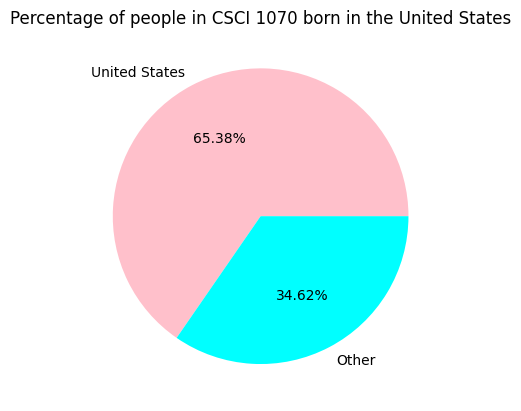

In [2]:
y = [65.3846, 34.6154]
my_labels = ['United States','Other']
my_colors = ['pink','cyan']
plt.pie(y, labels = my_labels, colors = my_colors, autopct='%1.2f%%')
plt.title('Percentage of people in CSCI 1070 born in the United States')
plt.show()

# This bar graph shows that only one student in the class is under 18 years of age, and that the rest of the students are over 18.

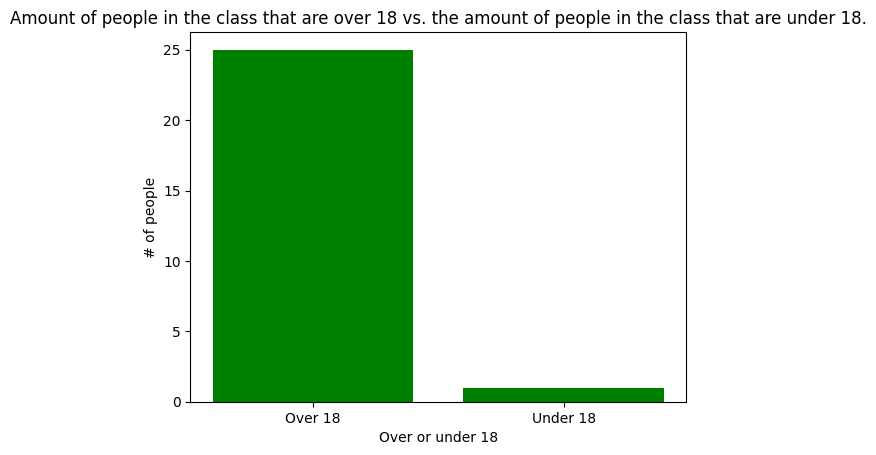

In [3]:
x = np.array(["Over 18","Under 18"])
y = np.array([25,1])
plt.title('Amount of people in the class that are over 18 vs. the amount of people in the class that are under 18.')
plt.ylabel('# of people')
plt.xlabel('Over or under 18')
plt.bar(x, y, color = "green")
plt.show()

# This dot plot shows me that there are 13 students in the class that don't own pets, 7 who have only dogs, 0 who have only cats, 4 who have both cats and dogs, and 2 who gave a response that was not able to be interpreted.

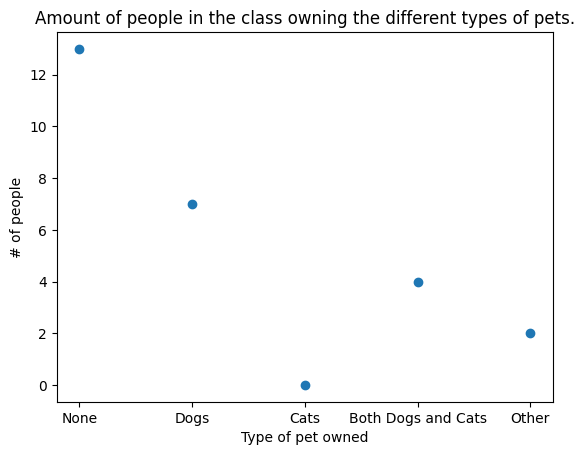

In [4]:
my_categories = ['None','Dogs', 'Cats', 'Both Dogs and Cats', 'Other']
y = [13, 7, 0, 4, 2]

plt.plot(my_categories, y, 'o')
plt.ylabel('# of people')
plt.xlabel('Type of pet owned')
plt.title('Amount of people in the class owning the different types of pets.')
plt.show()

# This pie chart shows that Italian food is the favorite type of food for the majority of students, followed by Mexican/Japanese, American/Indian, Chinese, and lastly, Korean/other.

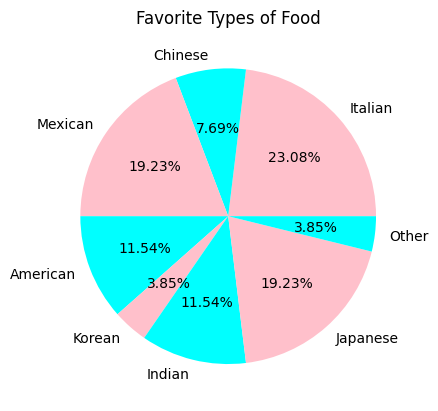

In [5]:
y = [6%26,2%26,5%26,3%26,1%26,3%26,5%26,1%26]
my_labels = ['Italian','Chinese','Mexican','American','Korean','Indian','Japanese','Other']
my_colors = ['pink','cyan']
plt.pie(y, labels=my_labels, colors=my_colors, autopct='%1.2f%%')
plt.title('Favorite Types of Food')
plt.show()

# This bar graph shows that the majority of students within this class are computer science majors.

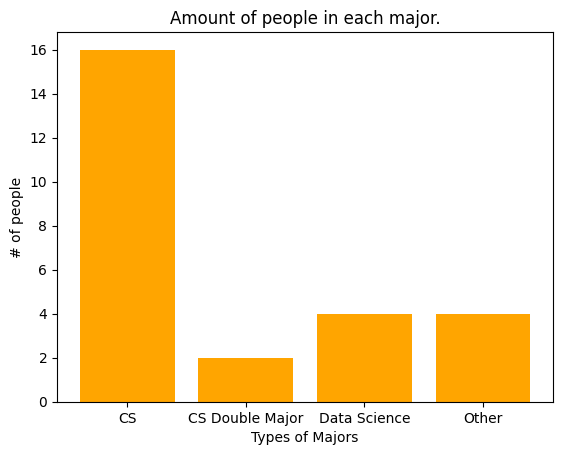

In [6]:
x = np.array(["CS","CS Double Major","Data Science", "Other"])
y = np.array([16,2,4,4])
plt.title('Amount of people in each major.')
plt.ylabel('# of people')
plt.xlabel('Types of Majors')
plt.bar(x, y, color = "orange")
plt.show()